In [1]:
using Oscar

  ___   ____   ____    _    ____
 / _ \ / ___| / ___|  / \  |  _ \   |  Combining ANTIC, GAP, Polymake, Singular
| | | |\___ \| |     / _ \ | |_) |  |  Type "?Oscar" for more information
| |_| | ___) | |___ / ___ \|  _ <   |  Manual: https://docs.oscar-system.org
 \___/ |____/ \____/_/   \_\_| \_\  |  Version 1.3.1


# A simple triangle

In [2]:
P = convex_hull([0 0; 1 0; 0 1])

Polyhedron in ambient dimension 2

In [3]:
facets(P)

3-element SubObjectIterator{AffineHalfspace{QQFieldElem}} over the halfspaces of R^2 described by:
-x_1 <= 0
-x_2 <= 0
x_1 + x_2 <= 1


In [4]:
show(f_vector(P))

ZZRingElem[3, 3]

In [5]:
volume(P)

1//2

In [6]:
?polyhedron

search: polyhedron Polyhedron turn_denominator_into_polyhedron



```
polyhedron(P::Polymake.BigObject)
```

Construct a `Polyhedron` corresponding to a `Polymake.BigObject` of type `Polytope`. Scalar type and parent field will be detected automatically. To improve type stability and performance, please use [`Polyhedron{T}(p::Polymake.BigObject, f::Field) where T<:scalar_types`](@ref) instead, where possible.

---

```
polyhedron([::Union{Type{T}, Field},] A::AnyVecOrMat, b) where T<:scalar_types
```

The (convex) polyhedron defined by

$$
P(A,b) = \{ x |  Ax ≤ b \}.
$$

see Def. 3.35 and Section 4.1. of [JT13](@cite)

The first argument either specifies the `Type` of its coefficients or their parent `Field`.

# Examples

The following lines define the square $[0,1]^2 \subset \mathbb{R}^2$:

```jldoctest
julia> A = [1 0; 0 1; -1 0 ; 0 -1];

julia> b = [1, 1, 0, 0];

julia> polyhedron(A,b)
Polyhedron in ambient dimension 2
```

---

```
polyhedron(::Union{Type{T}, Field}, I::Union{Nothing, AbstractCollection[AffineHalfspace]}, E::Union{Nothing, AbstractCollection[AffineHyperplane]} = nothing) where T<:scalar_types
```

The (convex) polyhedron obtained intersecting the halfspaces `I` (inequalities) and the hyperplanes `E` (equations). The first argument either specifies the `Type` of its coefficients or their parent `Field`.

# Examples

The following lines define the square $[0,1]^2 \subset \mathbb{R}^2$:

```jldoctest
julia> A = [1 0; 0 1; -1 0 ; 0 -1];

julia> b = [1, 1, 0, 0];

julia> polyhedron((A,b))
Polyhedron in ambient dimension 2
```

As an example for a polyhedron constructed from both inequalities and equations, we construct the polytope $[0,1]\times\{0\}\subset\mathbb{R}^2$

```jldoctest
julia> P = polyhedron(([-1 0; 1 0], [0,1]), ([0 1], [0]))
Polyhedron in ambient dimension 2

julia> is_feasible(P)
true

julia> dim(P)
1

julia> vertices(P)
2-element SubObjectIterator{PointVector{QQFieldElem}}:
 [1, 0]
 [0, 0]
```

---

```
polyhedron(C::Cone)
```

Turn a cone into a polyhedron.

---

```
polyhedron(td::ToricDivisor)
```

Construct the polyhedron $P_D$ of a torus invariant divisor $D:=td$ as in 4.3.2 of [CLS11](@cite). The lattice points of this polyhedron correspond to the global sections of the divisor.

# Examples

The polyhedron of the divisor with all coefficients equal to zero is a point, if the ambient variety is complete. Changing the coefficients corresponds to moving hyperplanes. One direction moves the hyperplane away from the origin, the other moves it across. In the latter case there are no global sections anymore and the polyhedron becomes empty.

```jldoctest
julia> F4 = hirzebruch_surface(NormalToricVariety, 4)
Normal toric variety

julia> td0 = toric_divisor(F4, [0,0,0,0])
Torus-invariant, non-prime divisor on a normal toric variety

julia> is_feasible(polyhedron(td0))
true

julia> dim(polyhedron(td0))
0

julia> td1 = toric_divisor(F4, [1,0,0,0])
Torus-invariant, prime divisor on a normal toric variety

julia> is_feasible(polyhedron(td1))
true

julia> td2 = toric_divisor(F4, [-1,0,0,0])
Torus-invariant, non-prime divisor on a normal toric variety

julia> is_feasible(polyhedron(td2))
false
```


# Some known polytopes

In [7]:
vertices(simplex(3))

4-element SubObjectIterator{PointVector{QQFieldElem}}:
 [0, 0, 0]
 [1, 0, 0]
 [0, 1, 0]
 [0, 0, 1]

In [8]:
cube(4)

Polytope in ambient dimension 4

In [9]:
?cube

search: cube schubert_class schubert_classes snub_cube dwarfed_cube



```
cube([::Union{Type{T}, Field} = QQFieldElem,] d::Int , [l::Rational = -1, u::Rational = 1])
```

Construct the $[l,u]$-cube in dimension $d$. The first argument either specifies the `Type` of its coefficients or their parent `Field`.

# Examples

In this example the 5-dimensional unit cube is constructed to ask for one of its properties:

```jldoctest
julia> C = cube(5,0,1);

julia> normalized_volume(C)
120
```


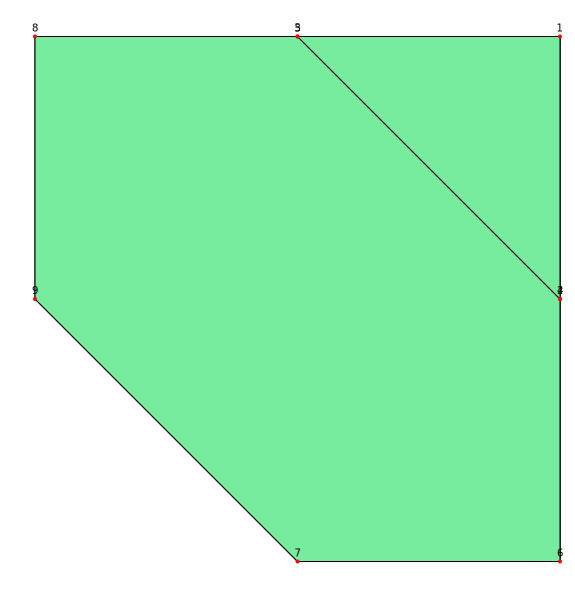

In [10]:
visualize(johnson_solid(3))

# Constructions

In [11]:
C = cube(3); facets(C)

6-element SubObjectIterator{AffineHalfspace{QQFieldElem}} over the halfspaces of R^3 described by:
-x_1 <= 1
x_1 <= 1
-x_2 <= 1
x_2 <= 1
-x_3 <= 1
x_3 <= 1


In [12]:
F = facets(Polyhedron,C)[1]

Polytope in ambient dimension 3

In [13]:
vertices(F)

4-element SubObjectIterator{PointVector{QQFieldElem}}:
 [-1, -1, -1]
 [-1, 1, -1]
 [-1, -1, 1]
 [-1, 1, 1]

In [14]:
dim(F)

2

In [15]:
f_vector(vertex_figure(C,1))

2-element Vector{ZZRingElem}:
 3
 3

In [16]:
f_vector(product(simplex(2),cube(2)))

4-element Vector{ZZRingElem}:
 12
 24
 19
 7

# Upper bound theorem

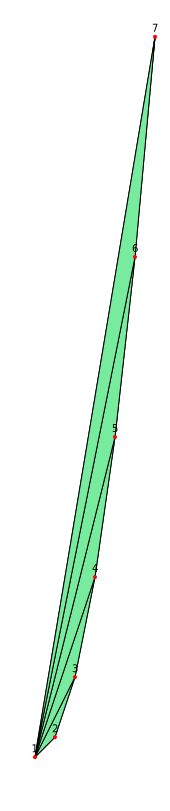

In [17]:
visualize(cyclic_polytope(3,7))

In [18]:
vertices(cyclic_polytope(3,7))

7-element SubObjectIterator{PointVector{QQFieldElem}}:
 [0, 0, 0]
 [1, 1, 1]
 [2, 4, 8]
 [3, 9, 27]
 [4, 16, 64]
 [5, 25, 125]
 [6, 36, 216]

In [19]:
@show f_vector(cyclic_polytope(4,8));

f_vector(cyclic_polytope(4, 8)) = ZZRingElem[8, 28, 40, 20]


In [20]:
@show upper_bound_f_vector(4,8);

upper_bound_f_vector(4, 8) = [8, 28, 40, 20]


In [21]:
@show upper_bound_f_vector(50,65);

upper_bound_f_vector(50, 65) = [65, 2080, 43680, 677040, 8259888, 82598880, 696190560, 5047381560, 31966749880, 179013799328, 895068996640, 4027810484880, 16421073515280, 60992558771040, 207374699821536, 648045936942300, 1867897112363100, 4981058966301600, 12321566916640800, 28339603908273840, 60727722660586800, 121455445321173600, 227068876035237600, 397370533061665800, 651687674221131912, 1002596408341288740, 1448194477572431680, 1965402816020404280, 2507552661945859840, 3008897817885170328, 3396450752504234880, 3606426809182564185, 3600178210366775310, 3374316996107710380, 2961972471328485888, 2425331524597093840, 1841875403830729280, 1287596308405905680, 821014413835674240, 472473089388983592, 242493816318062400, 109537137807774300, 42895476685432800, 14306482553243400, 3975209843776080, 893901140441400, 156109831768800, 19850172574050, 1634154642900, 65366185716]


# Nonrational coordinates

In [22]:
D = dodecahedron()

Polytope in ambient dimension 3 with EmbeddedAbsSimpleNumFieldElem type coefficients

In [23]:
vertices(D)

20-element SubObjectIterator{PointVector{EmbeddedAbsSimpleNumFieldElem}}:
 [1//2, 1//4*sqrt(5) + 3//4, 0]
 [-1//2, 1//4*sqrt(5) + 3//4, 0]
 [1//4*sqrt(5) + 1//4, 1//4*sqrt(5) + 1//4, 1//4*sqrt(5) + 1//4]
 [-1//4*sqrt(5) - 1//4, 1//4*sqrt(5) + 1//4, 1//4*sqrt(5) + 1//4]
 [1//4*sqrt(5) + 1//4, 1//4*sqrt(5) + 1//4, -1//4*sqrt(5) - 1//4]
 [0, 1//2, 1//4*sqrt(5) + 3//4]
 [-1//4*sqrt(5) - 1//4, 1//4*sqrt(5) + 1//4, -1//4*sqrt(5) - 1//4]
 [0, 1//2, -1//4*sqrt(5) - 3//4]
 [1//4*sqrt(5) + 3//4, 0, 1//2]
 [1//4*sqrt(5) + 3//4, 0, -1//2]
 [-1//4*sqrt(5) - 3//4, 0, 1//2]
 [-1//4*sqrt(5) - 3//4, 0, -1//2]
 [0, -1//2, 1//4*sqrt(5) + 3//4]
 [1//4*sqrt(5) + 1//4, -1//4*sqrt(5) - 1//4, 1//4*sqrt(5) + 1//4]
 [0, -1//2, -1//4*sqrt(5) - 3//4]
 [-1//4*sqrt(5) - 1//4, -1//4*sqrt(5) - 1//4, 1//4*sqrt(5) + 1//4]
 [1//4*sqrt(5) + 1//4, -1//4*sqrt(5) - 1//4, -1//4*sqrt(5) - 1//4]
 [-1//4*sqrt(5) - 1//4, -1//4*sqrt(5) - 1//4, -1//4*sqrt(5) - 1//4]
 [1//2, -1//4*sqrt(5) - 3//4, 0]
 [-1//2, -1//4*sqrt(5) - 3//4, 0

In [24]:
volume(D)

7//4*sqrt(5) + 15//4 (7.66)

In [25]:
lattice_points(D)

7-element SubObjectIterator{PointVector{ZZRingElem}}:
 [-1, 0, 0]
 [0, -1, 0]
 [0, 0, -1]
 [0, 0, 0]
 [0, 0, 1]
 [0, 1, 0]
 [1, 0, 0]

In [26]:
vertices(perles_nonrational_8_polytope())[1]

8-element PointVector{EmbeddedAbsSimpleNumFieldElem}:
 12575//63251*sqrt(5) + 125//63251 (0.45)
 12449//126502*sqrt(5) + 63249//126502 (0.72)
 -501//126502*sqrt(5) + 1001//126502 (-0.00)
 -24899//126502*sqrt(5) - 499//126502 (-0.44)
 12951//126502*sqrt(5) + 62751//126502 (0.72)
 0 (0.00)
 6225//63251*sqrt(5) - 31375//63251 (-0.28)
 -12575//63251*sqrt(5) - 125//63251 (-0.45)